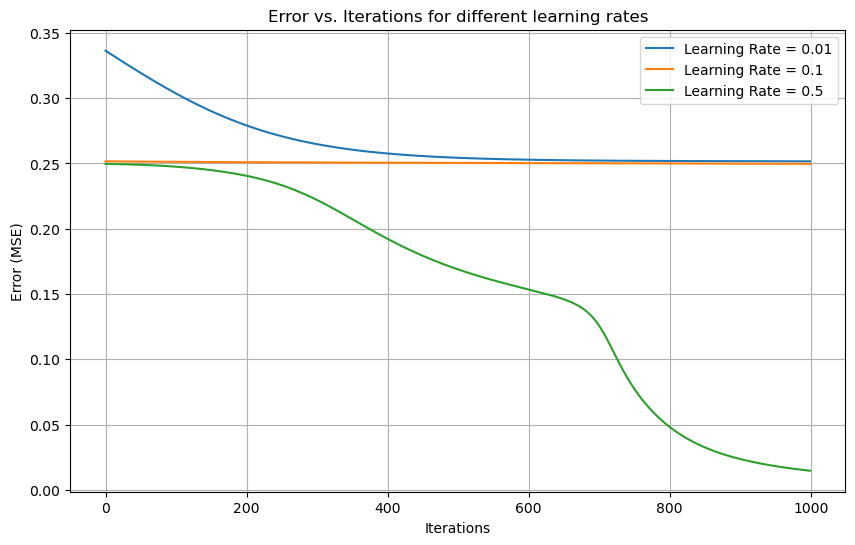

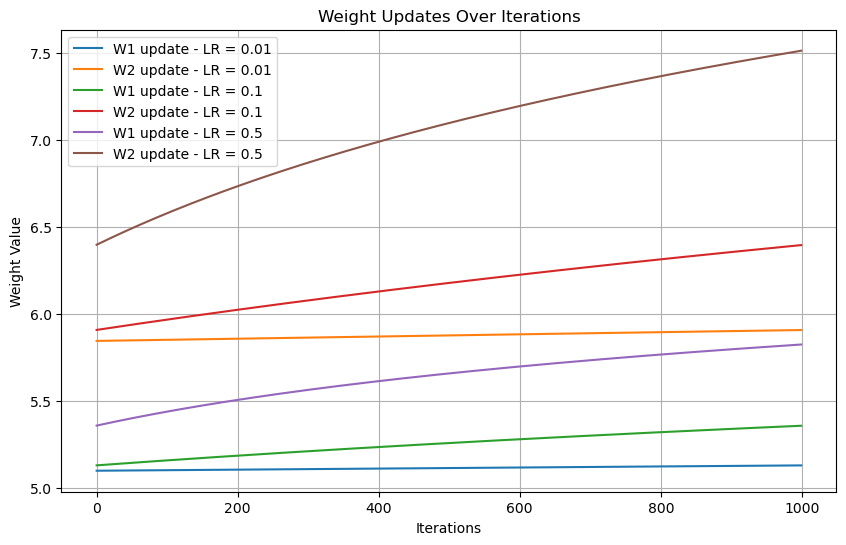

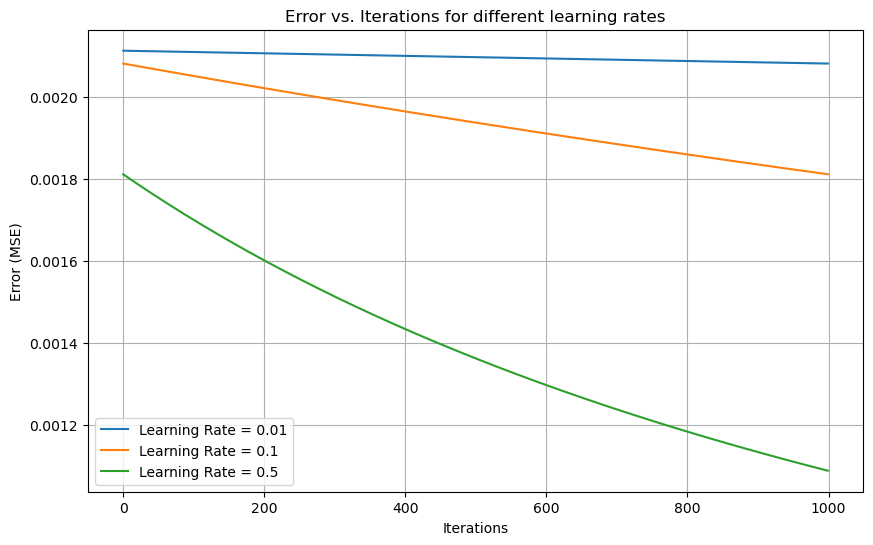

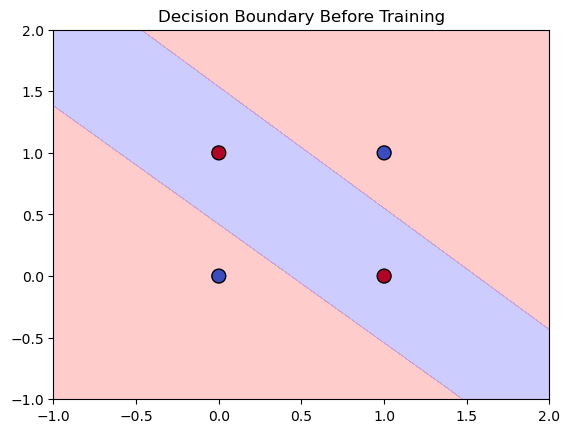

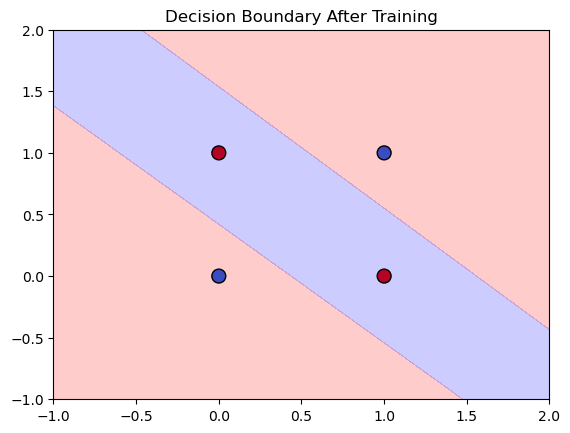

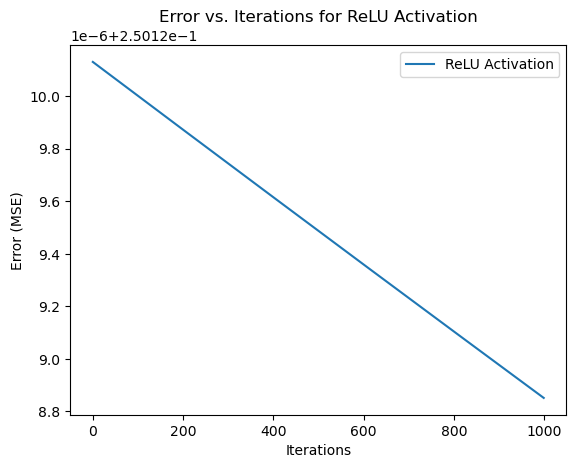

In [6]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

np.random.seed(42)
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])  
y = np.array([[0], [1], [1], [0]])  

input_size = 3  
hidden_size = 2
output_size = 1


W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))


def train_network_and_plot(learning_rate, iterations=1000, activation_func=sigmoid, activation_derivative=sigmoid_derivative):
    global W1, b1, W2, b2
    errors = []
    
    for i in range(iterations):
        
        hidden_input = np.dot(X, W1) + b1
        hidden_output = activation_func(hidden_input)

        output_input = np.dot(hidden_output, W2) + b2
        output = sigmoid(output_input)  

        
        error = y - output
        mse = np.mean(np.square(error))
        errors.append(mse)

        
        output_error = error * sigmoid_derivative(output)
        hidden_error = output_error.dot(W2.T) * activation_derivative(hidden_output)

        
        W2 += hidden_output.T.dot(output_error) * learning_rate
        b2 += np.sum(output_error, axis=0, keepdims=True) * learning_rate
        W1 += X.T.dot(hidden_error) * learning_rate
        b1 += np.sum(hidden_error, axis=0, keepdims=True) * learning_rate

    return errors


def train_network_and_track_weights(learning_rate, iterations=1000, activation_func=sigmoid, activation_derivative=sigmoid_derivative):
    global W1, b1, W2, b2
    weight_updates_W1 = []
    weight_updates_W2 = []
    
    for i in range(iterations):
        
        hidden_input = np.dot(X, W1) + b1
        hidden_output = activation_func(hidden_input)

        output_input = np.dot(hidden_output, W2) + b2
        output = sigmoid(output_input)  

        
        error = y - output

        
        output_error = error * sigmoid_derivative(output)
        hidden_error = output_error.dot(W2.T) * activation_derivative(hidden_output)

        
        W2 += hidden_output.T.dot(output_error) * learning_rate
        b2 += np.sum(output_error, axis=0, keepdims=True) * learning_rate
        W1 += X.T.dot(hidden_error) * learning_rate
        b1 += np.sum(hidden_error, axis=0, keepdims=True) * learning_rate

        
        weight_updates_W1.append(W1.flatten())
        weight_updates_W2.append(W2.flatten())

    return weight_updates_W1, weight_updates_W2


def plot_decision_boundary(X, y, W1, b1, W2, b2, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = np.zeros((xx.shape[0], xx.shape[1]))

    for i in range(xx.shape[0]):
        for j in range(yy.shape[1]):
            point = np.array([xx[i, j], yy[i, j], 1]).reshape(1, -1)
            hidden_input = np.dot(point, W1) + b1
            hidden_output = sigmoid(hidden_input)
            output_input = np.dot(hidden_output, W2) + b2
            Z[i, j] = sigmoid(output_input)

    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=['red', 'blue'], alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='coolwarm', s=100, edgecolors='k')
    plt.title(title)
    plt.show()


learning_rates = [0.01, 0.1, 0.5]

plt.figure(figsize=(10, 6))
for lr in learning_rates:
    errors = train_network_and_plot(lr)
    plt.plot(errors, label=f'Learning Rate = {lr}')

plt.xlabel('Iterations')
plt.ylabel('Error (MSE)')
plt.legend()
plt.title('Error vs. Iterations for different learning rates')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
for lr in learning_rates:
    weight_updates_W1, weight_updates_W2 = train_network_and_track_weights(lr)
    plt.plot([w[0] for w in weight_updates_W1], label=f'W1 update - LR = {lr}')
    plt.plot([w[0] for w in weight_updates_W2], label=f'W2 update - LR = {lr}')

plt.xlabel('Iterations')
plt.ylabel('Weight Value')
plt.legend()
plt.title('Weight Updates Over Iterations')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
for lr in learning_rates:
    errors = train_network_and_plot(lr)
    plt.plot(errors, label=f'Learning Rate = {lr}')

plt.xlabel('Iterations')
plt.ylabel('Error (MSE)')
plt.legend()
plt.title('Error vs. Iterations for different learning rates')
plt.grid(True)
plt.show()


plot_decision_boundary(X[:, :-1], y, W1, b1, W2, b2, title="Decision Boundary Before Training")

train_network_and_plot(learning_rate=0.01, iterations=1000)


plot_decision_boundary(X[:, :-1], y, W1, b1, W2, b2, title="Decision Boundary After Training")


def train_network_with_relu(learning_rate, iterations=1000):
    global W1, b1, W2, b2
    errors = []
    
    for i in range(iterations):
        
        hidden_input = np.dot(X, W1) + b1
        hidden_output = relu(hidden_input)

        output_input = np.dot(hidden_output, W2) + b2
        output = sigmoid(output_input)  


        error = y - output
        mse = np.mean(np.square(error))
        errors.append(mse)

        
        output_error = error * sigmoid_derivative(output)
        hidden_error = output_error.dot(W2.T) * relu_derivative(hidden_output)

       
        W2 += hidden_output.T.dot(output_error) * learning_rate
        b2 += np.sum(output_error, axis=0, keepdims=True) * learning_rate
        W1 += X.T.dot(hidden_error) * learning_rate
        b1 += np.sum(hidden_error, axis=0, keepdims=True) * learning_rate

    return errors


errors_relu = train_network_with_relu(learning_rate=0.01, iterations=1000)
plt.plot(errors_relu, label='ReLU Activation')
plt.xlabel('Iterations')
plt.ylabel('Error (MSE)')
plt.legend()
plt.title('Error vs. Iterations for ReLU Activation')
plt.show()
